In [9]:
!pip install pandas numpy matplotlib seaborn scikit-learn tensorflow keras

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [11]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

# ✅ FIX for corrupted/truncated images
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True


In [12]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("abdelghaniaaba/wildfire-prediction-dataset")

print("Path to dataset files:", path)

C:\Users\mrudu\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Path to dataset files: C:\Users\mrudu\.cache\kagglehub\datasets\abdelghaniaaba\wildfire-prediction-dataset\versions\1


In [13]:
import os

# Check what files are in the dataset folder
folder_path = r'C:\Users\mrudu\.cache\kagglehub\datasets\abdelghaniaaba\wildfire-prediction-dataset\versions\1'
print(os.listdir(folder_path))


['test', 'train', 'valid']


In [14]:
import os

train_folder = r'C:\Users\mrudu\.cache\kagglehub\datasets\abdelghaniaaba\wildfire-prediction-dataset\versions\1\train'
print(os.listdir(train_folder))


['nowildfire', 'wildfire']


In [15]:
# Test folder
test_folder = r'C:\Users\mrudu\.cache\kagglehub\datasets\abdelghaniaaba\wildfire-prediction-dataset\versions\1\test'
print("Test folder contents:", os.listdir(test_folder))

# Valid folder
valid_folder = r'C:\Users\mrudu\.cache\kagglehub\datasets\abdelghaniaaba\wildfire-prediction-dataset\versions\1\valid'
print("Valid folder contents:", os.listdir(valid_folder))


Test folder contents: ['nowildfire', 'wildfire']
Valid folder contents: ['nowildfire', 'wildfire']


In [16]:
# Set base path
base_path = r'C:\Users\mrudu\.cache\kagglehub\datasets\abdelghaniaaba\wildfire-prediction-dataset\versions\1'

train_path = os.path.join(base_path, 'train')
valid_path = os.path.join(base_path, 'valid')
test_path = os.path.join(base_path, 'test')


In [17]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input


In [18]:
# Image preprocessing
train_datagen = ImageDataGenerator(rescale=1./255, rotation_range=20, zoom_range=0.2, horizontal_flip=True)
valid_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Load images
train_generator = train_datagen.flow_from_directory(
    train_path, target_size=(128, 128), batch_size=32, class_mode='binary')

valid_generator = valid_datagen.flow_from_directory(
    valid_path, target_size=(128, 128), batch_size=32, class_mode='binary')

test_generator = test_datagen.flow_from_directory(
    test_path, target_size=(128, 128), batch_size=32, class_mode='binary', shuffle=False)


Found 2880 images belonging to 2 classes.
Found 6300 images belonging to 2 classes.
Found 6300 images belonging to 2 classes.


In [19]:
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(128,128,3)),
    layers.MaxPooling2D(2,2),
    
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    
    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()


C:\Users\mrudu\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       3,211,392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,304,769 (12.61 MB)

 Trainable params: 3,304,769 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

In [20]:
history = model.fit(
    train_generator,
    validation_data=valid_generator,
    epochs=10
)


C:\Users\mrudu\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 82s 872ms/step - accuracy: 0.9714 - loss: 0.1353 - val_accuracy: 0.4476 - val_loss: 1.6244
Epoch 2/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 78s 871ms/step - accuracy: 0.9789 - loss: 0.0640 - val_accuracy: 0.4476 - val_loss: 1.9227
Epoch 3/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 78s 868ms/step - accuracy: 0.9820 - loss: 0.0584 - val_accuracy: 0.4476 - val_loss: 2.1356
Epoch 4/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 78s 871ms/step - accuracy: 0.9768 - loss: 0.0722 - val_accuracy: 0.4651 - val_loss: 0.9711
Epoch 5/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 79s 881ms/step - accuracy: 0.9867 - loss: 0.0386 - val_accuracy: 0.4614 - val_loss: 1.1439
Epoch 6/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 79s 874ms/step - accuracy: 0.9851 - loss: 0.0440 - val_accuracy: 0.4627 - val_loss: 2.1521
Epoch 7/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 81s 902ms/step - accuracy: 0.9809 - loss: 0.0624 - val_accuracy: 0.4725 - val_loss: 1.1468
Epoch 8/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 80s 894ms/step - accuracy: 0.9794 - loss: 0.0573 - val_accu

In [21]:
loss, acc = model.evaluate(test_generator)
print(f"Test Accuracy: {acc:.2f}")


197/197 ━━━━━━━━━━━━━━━━━━━━ 37s 189ms/step - accuracy: 0.8830 - loss: 0.2954
Test Accuracy: 0.68


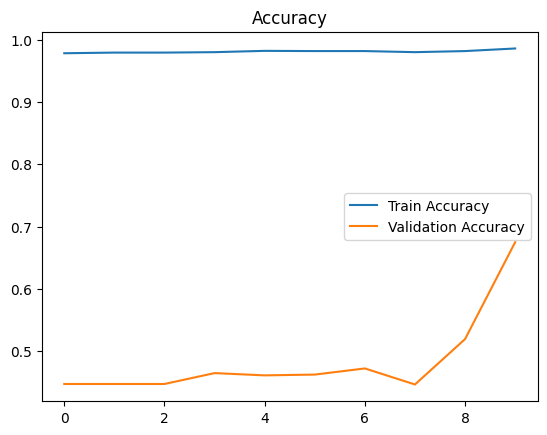

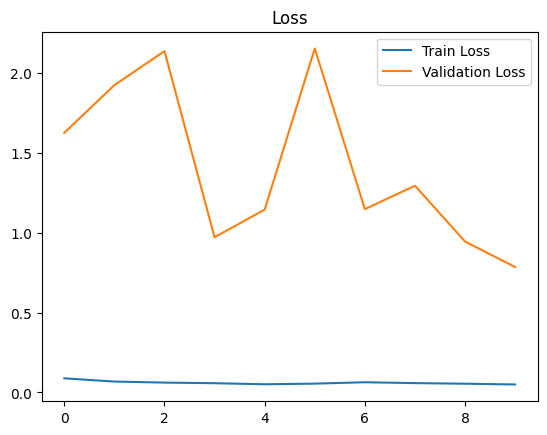

In [22]:
# Accuracy plot
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')
plt.show()

# Loss plot
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss')
plt.show()


In [23]:
# Evaluate on test data
loss, accuracy = model.evaluate(test_generator)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")


197/197 ━━━━━━━━━━━━━━━━━━━━ 30s 154ms/step - accuracy: 0.8830 - loss: 0.2954
Test Loss: 0.7840
Test Accuracy: 0.6783


197/197 ━━━━━━━━━━━━━━━━━━━━ 30s 149ms/step
              precision    recall  f1-score   support

  nowildfire       0.58      1.00      0.74      2820
    wildfire       1.00      0.42      0.59      3480

    accuracy                           0.68      6300
   macro avg       0.79      0.71      0.66      6300
weighted avg       0.81      0.68      0.66      6300



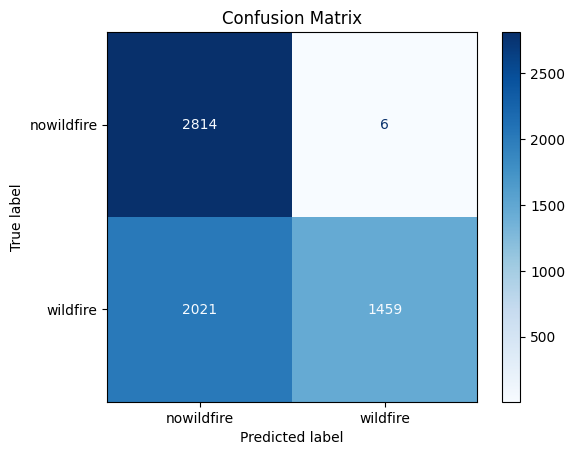

In [24]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# Get predictions
y_pred = model.predict(test_generator)
y_pred_classes = (y_pred > 0.5).astype("int32").flatten()
y_true = test_generator.classes

# Classification report
print(classification_report(y_true, y_pred_classes, target_names=['nowildfire', 'wildfire']))

# Confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['nowildfire', 'wildfire'])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()


In [25]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout

# Preprocessing for MobileNetV2
preprocess_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

train_pre = preprocess_datagen.flow_from_directory(train_path, target_size=(224, 224), batch_size=32, class_mode='binary')
valid_pre = preprocess_datagen.flow_from_directory(valid_path, target_size=(224, 224), batch_size=32, class_mode='binary')
test_pre  = preprocess_datagen.flow_from_directory(test_path,  target_size=(224, 224), batch_size=32, class_mode='binary', shuffle=False)

# Load MobileNetV2 without top layer
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224,224,3))
base_model.trainable = False

# Add custom top layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.3)(x)
predictions = Dense(1, activation='sigmoid')(x)

# Final model
transfer_model = Model(inputs=base_model.input, outputs=predictions)
transfer_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train
transfer_history = transfer_model.fit(train_pre, validation_data=valid_pre, epochs=5)


Found 2880 images belonging to 2 classes.
Found 6300 images belonging to 2 classes.
Found 6300 images belonging to 2 classes.


C:\Users\mrudu\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
90/90 ━━━━━━━━━━━━━━━━━━━━ 173s 2s/step - accuracy: 0.8868 - loss: 0.2432 - val_accuracy: 0.4819 - val_loss: 1.2245
Epoch 2/5
90/90 ━━━━━━━━━━━━━━━━━━━━ 161s 2s/step - accuracy: 0.9787 - loss: 0.0546 - val_accuracy: 0.5857 - val_loss: 0.9916
Epoch 3/5
90/90 ━━━━━━━━━━━━━━━━━━━━ 158s 2s/step - accuracy: 0.9840 - loss: 0.0388 - val_accuracy: 0.6583 - val_loss: 0.8641
Epoch 4/5
90/90 ━━━━━━━━━━━━━━━━━━━━ 162s 2s/step - accuracy: 0.9916 - loss: 0.0273 - val_accuracy: 0.7090 - val_loss: 0.7409
Epoch 5/5
90/90 ━━━━━━━━━━━━━━━━━━━━ 155s 2s/step - accuracy: 0.9916 - loss: 0.0237 - val_accuracy: 0.6667 - val_loss: 0.9035


In [27]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True


In [28]:
# Evaluate performance on test data
loss, accuracy = transfer_model.evaluate(test_pre)
print(f"MobileNetV2 Test Accuracy: {accuracy:.4f}")


197/197 ━━━━━━━━━━━━━━━━━━━━ 112s 567ms/step - accuracy: 0.8817 - loss: 0.3177
MobileNetV2 Test Accuracy: 0.6683


197/197 ━━━━━━━━━━━━━━━━━━━━ 116s 574ms/step
              precision    recall  f1-score   support

  nowildfire       0.57      1.00      0.73      2820
    wildfire       1.00      0.40      0.57      3480

    accuracy                           0.67      6300
   macro avg       0.79      0.70      0.65      6300
weighted avg       0.81      0.67      0.64      6300



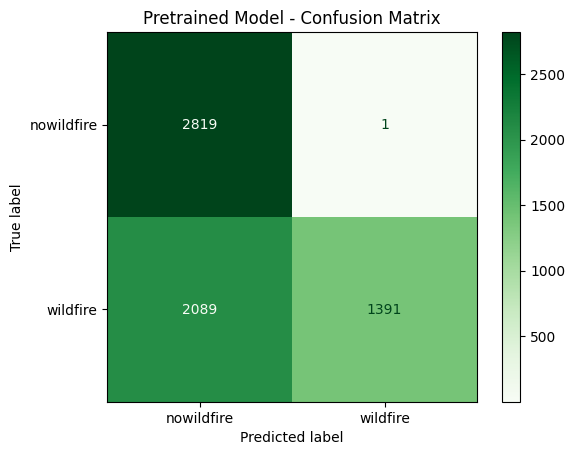

In [29]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# Get predictions
y_pred_pretrained = transfer_model.predict(test_pre)
y_pred_classes_pretrained = (y_pred_pretrained > 0.5).astype("int32").flatten()
y_true_pretrained = test_pre.classes

# Classification report
print(classification_report(y_true_pretrained, y_pred_classes_pretrained, target_names=['nowildfire', 'wildfire']))

# Confusion matrix
cm = confusion_matrix(y_true_pretrained, y_pred_classes_pretrained)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['nowildfire', 'wildfire'])
disp.plot(cmap='Greens')
plt.title("Pretrained Model - Confusion Matrix")
plt.show()


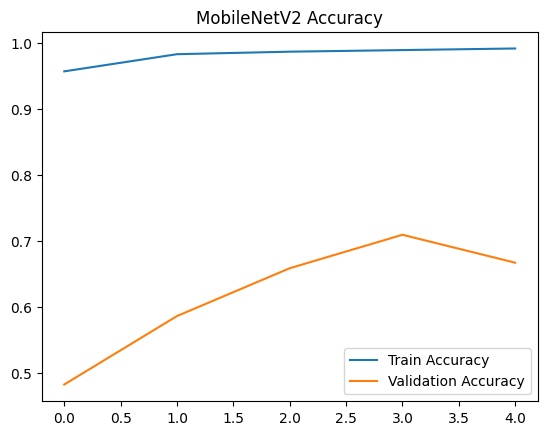

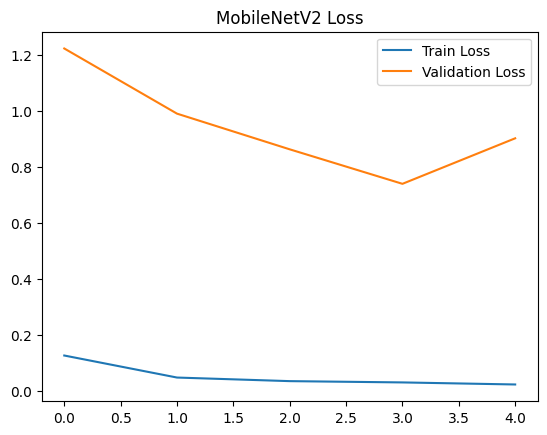

In [30]:
# Accuracy plot
plt.plot(transfer_history.history['accuracy'], label='Train Accuracy')
plt.plot(transfer_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('MobileNetV2 Accuracy')
plt.legend()
plt.show()

# Loss plot
plt.plot(transfer_history.history['loss'], label='Train Loss')
plt.plot(transfer_history.history['val_loss'], label='Validation Loss')
plt.title('MobileNetV2 Loss')
plt.legend()
plt.show()


197/197 ━━━━━━━━━━━━━━━━━━━━ 112s 566ms/step


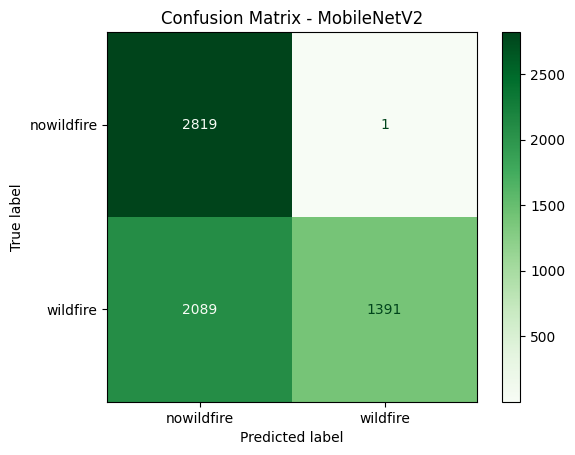

In [31]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(
    test_pre.classes,
    (transfer_model.predict(test_pre) > 0.5).astype("int32").flatten(),
    display_labels=['nowildfire', 'wildfire'],
    cmap='Greens'
)
plt.title("Confusion Matrix - MobileNetV2")
plt.show()
